# SyriaTel Customer Churn Modeling Project
**Author:** Joseph Ngige

## Project Overview
***

The goal of this project is to build a classification model that predicts whether a customer will soon stop doing business with SyriaTel, a telecommunications company, in order to help SyriaTel reduce churn by identifying at-risk customers and implementing targeted retention strategies. By developing a predictive model based on customer data, the project aims to classify whether a customer is likely to churn, providing valuable insights to SyriaTel's business stakeholders who are focused on minimizing customer churn to reduce revenue loss. The outcome of this project enables SyriaTel to identify at-risk customers and take proactive measures to retain them, ultimately supporting the company's efforts to maintain customer loyalty and improve profitability. Specifically, the outcome indicated that SyriaTel should 1) Establish targeted plans for high usage customers, 2) Improve International Service, 3) Enhance Customer Service and 4) Implement Region-Specific approach to customer retention.

## Business Understanding
***

Customer churn is a critical issue for telecommunications companies like SyriaTel, as high churn rates lead to significant revenue loss and increased customer acquisition costs. In the telecommunications industry, where customer retention directly impacts revenue, minimizing churn is essential. The business objective is to identify patterns in customer behavior that signal an impending departure and predict churn, enabling SyriaTel to proactively engage at-risk customers with targeted retention offers. By focusing retention efforts on customers who are likely to leave, SyriaTel can optimize its marketing strategies and customer support resources, ultimately improving profitability and sustaining customer loyalty.

## Data Understanding
***

The curated dataset provided contains information about SyriaTel customers, including features related to customer behavior, demographics, and service usage. The features include variables such as account length, international plan, total day minutes, and customer service calls. The target variable is binary, indicating whether a customer has churned (True) or not (False). The dataset encompasses both numerical and categorical features, providing a comprehensive foundation for building a predictive model to identify at-risk customers.

### Data Analysis

Performed Exploratory Data Analysis (EDA) to examine the features and target, investigate their relationship, identify correlations, and detect any data quality issues as a foundation for data preprocessing and feature selection.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv("churn_data.csv")

# Display the first few rows of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# Check out the dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
# Check out the data dimension
data.shape

(3333, 21)

#### Variable Descriptions
Based on domain knowledge.

* **state:** Categorical variable indicating the customer's state.
* **account length:** Numeric variable indicating the length of the customer account.
* **area code:** Numeric variable indicating the area code of the customer.
* **phone number:** Categorical variable representing the customers number.
* **international plan:** Categorical variable indicating if the customer has an international plan.
**voice mail plan:** Categorical variable indicating if the customer has a voicemail plan.
* **number vmail messages:** Numeric variable indicating the number of voicemail messages.
* **total day/eve/night/intl minutes:** Numeric variables indicating usage minutes in various time segments.
* **total day/eve/night/intl calls:** Numeric variables indicating the number of calls in various time segments.
* **total day/eve/night/intl charge:** Numeric variables indicating charges in various time segments.
* **customer service calls:** Numeric variable indicating the number of customer service calls made by the customer.
* **churn:** Binary target variable indicating customer churn (True/False).

**Initial Data Analysis Comments:** 
The dataset consists of 3,333 entries and 21 columns, with features such as 'account length', 'international plan', 'total day minutes', 'customer service calls', and the target variable 'churn'. The target variable is binary, indicating whether a customer churned (True) or not (False). The dataset includes both numerical and categorical features, with no immediately visible missing values.

#### Churn Analysis

Analyzed the churn variable to investigate class balance and further understand its relationship with features.

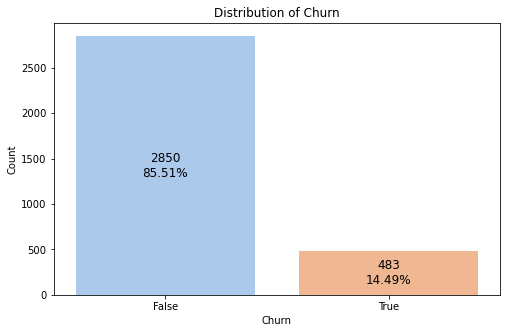

In [4]:
# Calculate total number of entries
total = len(data)

# Create the count plot for the churn variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='churn', data=data, palette='pastel')

# Adding counts and percentages inside the bars
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.2f}%'
    count = int(p.get_height())
    ax.annotate(f'{count}\n{percentage}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha='center', va='center', color='black', fontsize=12)

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

**Churn Balance Comments:** The count plot shows that the dataset is imbalanced, with fewer customers labeled as churned (True), 14.49% compared to those who did not churn (False), 85.51%.

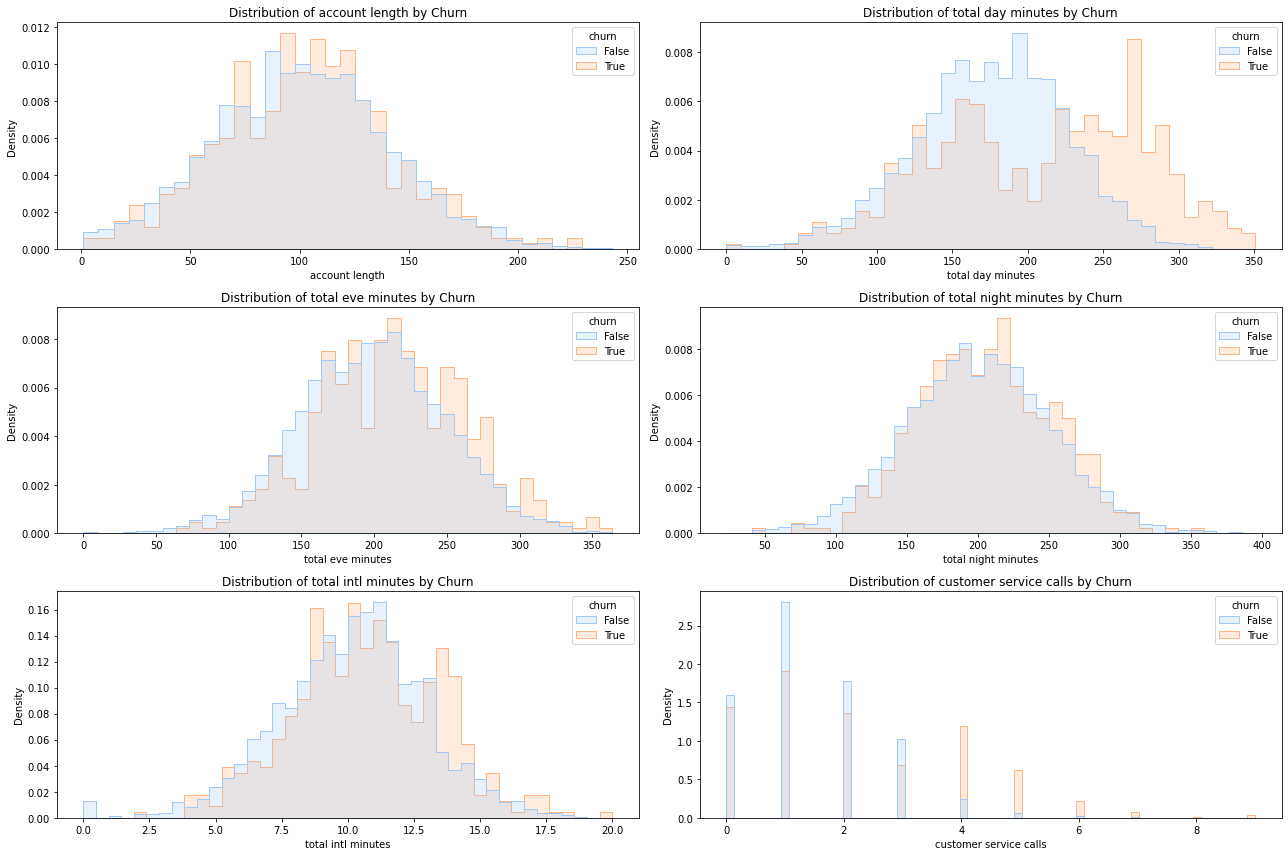

In [5]:
# Visualize Feature Distributions
# List of numerical features to plot
numerical_features = ['account length', 'total day minutes', 'total eve minutes', 
                      'total night minutes', 'total intl minutes', 'customer service calls']

# Plotting distributions for churn and non-churn customers
plt.figure(figsize=(18, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=data, x=feature, hue='churn', element='step', stat='density', common_norm=False, palette='pastel')
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

**Distribution plot Comments:** The distribution plots reveal that customers with higher total day minutes and more frequent customer service calls show a stronger tendency to churn, indicating potential dissatisfaction among heavy daytime users and those with unresolved service issues. There is also a slight trend suggesting that higher international and night usage may correlate with churn, though these factors are less pronounced. In contrast, account length and evening minutes show little difference between churned and non-churned customers, suggesting they are less influential in predicting churn. These suggest that SyriaTel should consider focusing on improving customer service experiences and offering targeted retention plans for heavy users, particularly those with high daytime and international usage, to reduce churn.

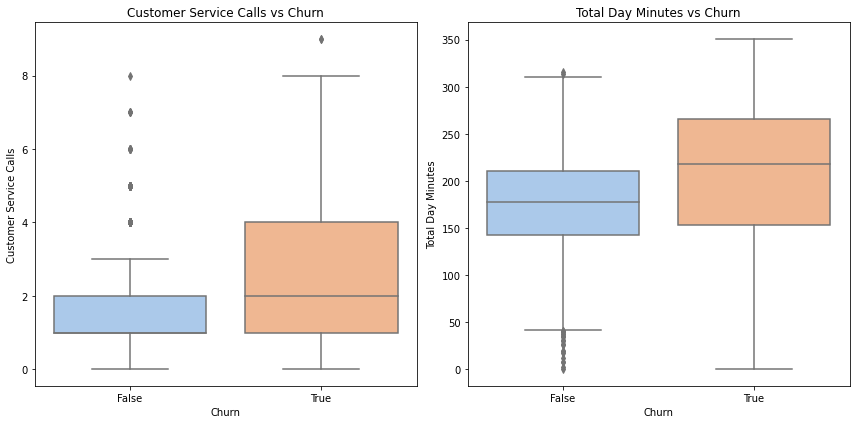

In [6]:
# Create boxplots to analyze Customer Service Calls and Total Day Minutes further
plt.figure(figsize=(12, 6))

# Subplot 1: Customer Service Calls vs Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='churn', y='customer service calls', data=data, palette='pastel')
plt.title('Customer Service Calls vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')

# Subplot 2: Total Day Minutes vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='churn', y='total day minutes', data=data, palette='pastel')
plt.title('Total Day Minutes vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')

# Adjust the layout
plt.tight_layout()
plt.show()

**Boxplot Comments:** These boxplots highlight two important trends: frequent customer service calls and high daytime usage are both associated with a higher likelihood of churn. By focusing on improving customer service and offering targeted retention strategies for heavy users, SyriaTel could address key factors contributing to customer churn.

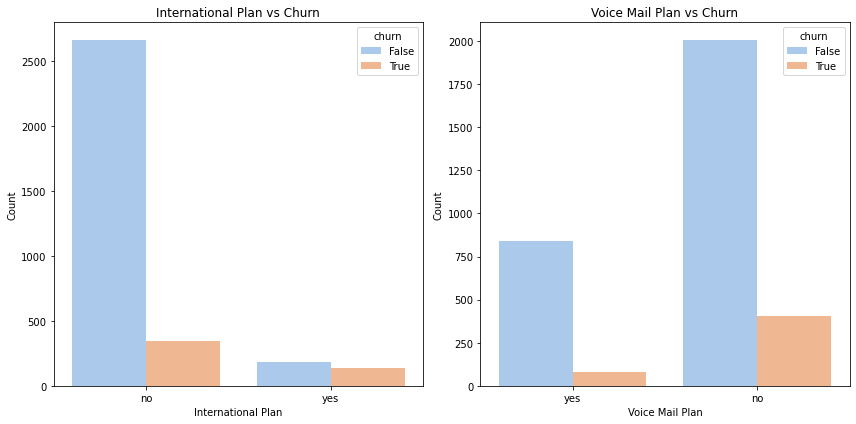

In [7]:
# Display count plots to analyze International Plan and Voice Mail Plan vs churn
plt.figure(figsize=(12, 6))

# Subplot 1: International Plan vs Churn
plt.subplot(1, 2, 1)
sns.countplot(x='international plan', hue='churn', data=data, palette='pastel')
plt.title('International Plan vs Churn')
plt.xlabel('International Plan')
plt.ylabel('Count')

# Subplot 2: Voice Mail Plan vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', hue='churn', data=data, palette='pastel')
plt.title('Voice Mail Plan vs Churn')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()

**Count Plot Comments:** These count plots suggest that the international plan might be a point of dissatisfaction for some customers, leading to higher churn rates, while the voice mail plan appears to contribute positively to customer retention. SyriaTel could consider enhancing the value of their international plans and leveraging the voice mail plan in retention strategies to minimize churn.

#### Numerical Variable Correlation 

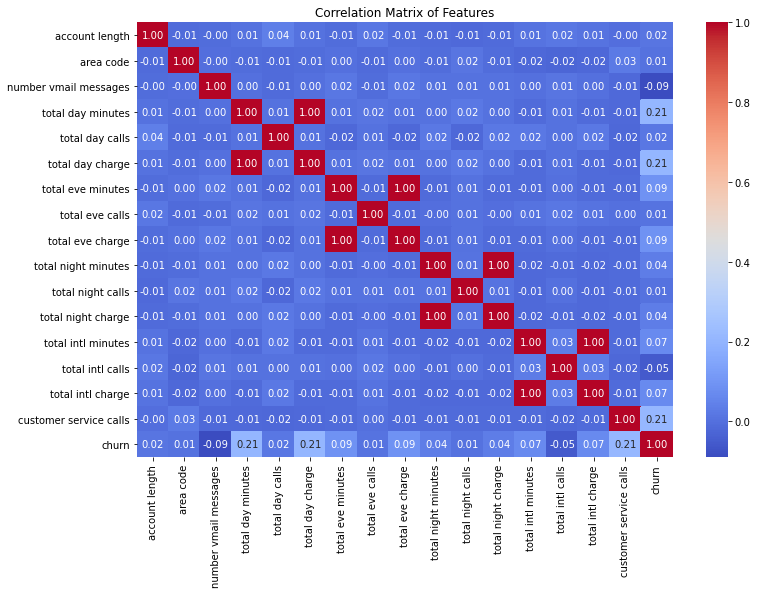

In [8]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

**Correlation Comments:** 
The correlation matrix indicates that most of the numerical features in the dataset are relatively independent, with only moderate positive correlations observed among related features like minutes, calls, and charges within the same time periods.

#### Categorical Variable (State & AreaCode) Analysis
Used the Chi-Square test of independence to check if state and area code are significantly associated with churn.

In [9]:
from scipy.stats import chi2_contingency

# Function to perform Chi-Square Test
def chi_square_test(feature):
    contingency_table = pd.crosstab(data[feature], data['churn'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2: {chi2}")
    print(f"P-value: {p}")
    print("-----\n")

# Perform Chi-Square Test for 'state' and 'area code'
chi_square_test('state')
chi_square_test('area code')

Chi-Square Test for state:
Chi2: 83.04379191019663
P-value: 0.002296221552011188
-----

Chi-Square Test for area code:
Chi2: 0.17754069117425395
P-value: 0.9150556960243712
-----



**Test Results Comments:** The Chi-Square test results indicate that there is a statistically significant association between the state in which a customer resides and their likelihood of churning, suggesting that SyriaTel should consider region-specific strategies to address churn. In contrast, the area code does not have a significant impact on churn, indicating that it is not a useful factor for targeting retention efforts.

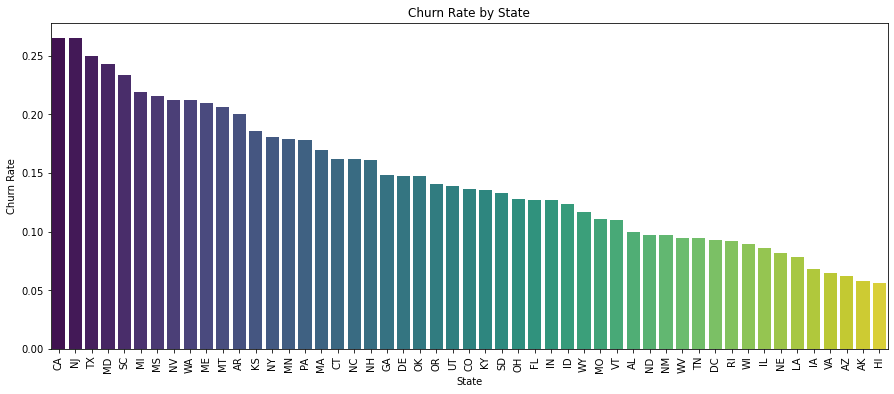

In [10]:
# Plot churn rate by state
plt.figure(figsize=(15, 6))
state_churn = data.groupby('state')['churn'].mean().sort_values(ascending=False)
sns.barplot(x=state_churn.index, y=state_churn.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()

**Churn by State Comments:** The states on the left side of the plot have the highest churn rates. These states could be areas where customers are more dissatisfied or where there might be higher competition, leading to a higher likelihood of customers leaving SyriaTel. The gradual decline from the highest to the lowest churn rates indicates that there is significant variation in churn across different states. This further supports the earlier finding that state is a significant factor influencing churn.

#### Feature Selection & Preprocessing

Irrelevant columns like phone number and area code were dropped as they do not contribute meaningful information for predicting churn. Additionally, redundant columns such as total day/evening/night charges and calls were removed because they directly relate to the corresponding minutes columns, potentially leading to redundancy and multicollinearity in the model.

In [11]:
# Drop the irrelevant and redundant columns
df = data.drop(columns=[
    'phone number', 
    'area code', 
    'total day charge', 
    'total eve charge', 
    'total night charge', 
    'total intl charge',
    'total day calls',
    'total eve calls',
    'total night calls',
    'total intl calls'
])

# Display the first few rows of the updated dataframe
df.head()


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls,churn
0,KS,128,no,yes,25,265.1,197.4,244.7,10.0,1,False
1,OH,107,no,yes,26,161.6,195.5,254.4,13.7,1,False
2,NJ,137,no,no,0,243.4,121.2,162.6,12.2,0,False
3,OH,84,yes,no,0,299.4,61.9,196.9,6.6,2,False
4,OK,75,yes,no,0,166.7,148.3,186.9,10.1,3,False


In [12]:
# Check out the data dimension
df.shape

(3333, 11)

Separated the features & target and split the data (80:20) into a training and test set. The data was split before preprocessing to avoid any data leakage.

In [13]:
# Separate the features (X) and target (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 10), (667, 10), (2666,), (667,))

Encoded categorical variables: international plan and voice mail plan converted to binary (0 and 1) and State was one-hot encoded, creating multiple binary columns representing each state.

In [14]:
# Identify categorical features
categorical_features = ['state', 'international plan', 'voice mail plan']
numerical_features = X_train.columns.difference(categorical_features)

# Set up the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit the encoder on the training set (X_train) and transform both training and test sets
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert the encoded features back to DataFrames for easier concatenation
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Reset index to align with numerical features
X_train_encoded_df.index = X_train.index
X_test_encoded_df.index = X_test.index

# Concatenate the numerical features back with the encoded categorical features
X_train_final = pd.concat([X_train[numerical_features], X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test[numerical_features], X_test_encoded_df], axis=1)

# Display the first few rows of the final training set
X_train_final.head()

,account length,customer service calls,number vmail messages,total day minutes,total eve minutes,total intl minutes,total night minutes,state_AL,state_AR,state_AZ,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
817,243,2,0,95.5,163.7,6.6,264.2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,108,4,0,112.0,193.7,4.1,208.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,75,1,0,222.4,327.0,8.7,208.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56,141,1,0,126.9,180.0,8.0,140.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,86,0,0,216.3,266.3,4.5,214.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling
***

Followed an iterative approach to modeling, beginning with simple Logistic Regression & Decision Tree models and gradually increasing complexity.

### Model 1: Logistic Regression

Developed a basic logistic regression model before addressing churn class imbalance.

In [15]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train_final, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_final)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the evaluation scores
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8590704647676162
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.61      0.20      0.30       101

    accuracy                           0.86       667
   macro avg       0.74      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



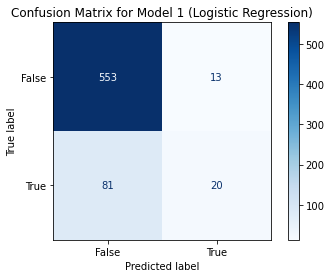

In [16]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plot the confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 1 (Logistic Regression)")
plt.show()

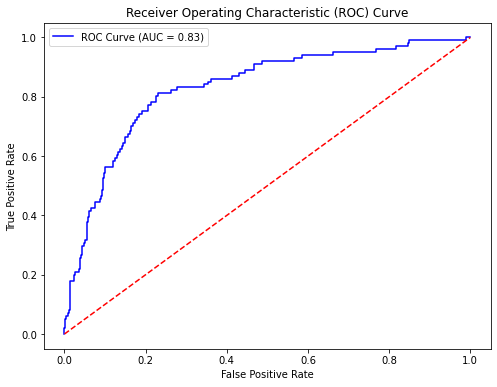

In [17]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_final)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Model 1 Comments:** Performs well in predicting non-churn customers, true negatives, (553 out of 566) but struggles with identifying churn customers accurately, which is critical in this business context. The low recall for the churn class 0.198 (19.8%) suggests that the model is missing a significant number of actual churners, which could be a problem for the business as it may lead to lost customers who could have been retained. The AUC score of 0.83 (83%) is encouraging interms of the model's ability to distinguish the classes, but efforts should be made to improve the recall for churn prediction. Moving forward, it may be beneficial to explore ways to improve the model's ability to predict churn, such as adjusting the class weights, trying different algorithms, or further tuning the model.

### Model 2: Logistic Regression with SMOTE

Developed a second logistic regression model with Synthetic Minority Over-sampling Technique (SMOTE) technique applied to address churn class imbalance in the training set.

In [18]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# Initialize and train a new Logistic Regression model on the resampled data
log_reg_resampled = LogisticRegression(random_state=42, max_iter=1000)
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_resampled = log_reg_resampled.predict(X_test_final)

# Evaluate the model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
report_resampled = classification_report(y_test, y_pred_resampled)

# Display the evaluation scores
print(f"Accuracy: {accuracy_resampled}")
print("Classification Report:\n", report_resampled)

Accuracy: 0.7661169415292354
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.77      0.85       566
        True       0.37      0.76      0.50       101

    accuracy                           0.77       667
   macro avg       0.66      0.76      0.67       667
weighted avg       0.86      0.77      0.79       667



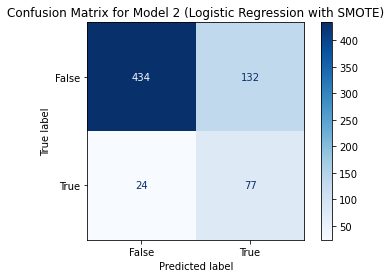

In [19]:
# Generate the confusion matrix for Model 2
cm_resampled = confusion_matrix(y_test, y_pred_resampled)

# Create a ConfusionMatrixDisplay object
cmd_resampled = ConfusionMatrixDisplay(confusion_matrix=cm_resampled, display_labels=log_reg_resampled.classes_)

# Plot the confusion matrix
cmd_resampled.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 2 (Logistic Regression with SMOTE)")
plt.show()

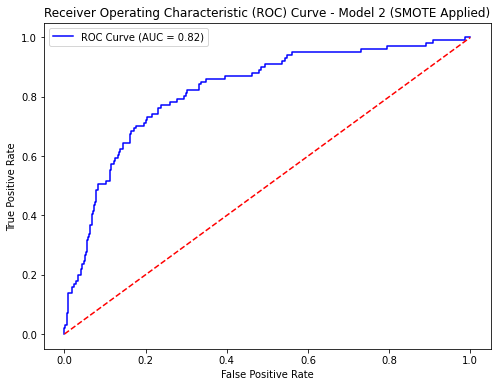

In [20]:
# Calculate ROC AUC score for the resampled model
roc_auc_resampled = roc_auc_score(y_test, log_reg_resampled.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve for the resampled model
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test, log_reg_resampled.predict_proba(X_test_final)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, color='blue', label=f'ROC Curve (AUC = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 2 (SMOTE Applied)')
plt.legend()
plt.show()

**Model 2 Comments:** The application of SMOTE (Synthetic Minority Over-sampling Technique), to balance the classes in the training set, has significantly improved the model's ability to predict churn cases (77 out of 101), as evidenced by the higher recall for the churn class (0.76 compared to 0.20 in Model 1). This suggests that Model 2 is better at identifying customers at risk of churning. The precision for the churn class is lower, meaning there are more false positives (132), non-churn customers incorrectly predicted as churn. However, this is a common trade-off when addressing class imbalance, and in many business contexts, it's more important to identify as many potential churners as possible, even at the cost of some false positives. While the overall accuracy has decreased, this is expected and not necessarily negative. The model is now more focused on identifying churn cases, which is the primary goal. The AUC remains strong at 0.82 (82%), indicating that the model still has good discriminative ability. Model 2, with SMOTE applied, represents a significant improvement in identifying churners, which is crucial for SyriaTel business strategies aimed at customer retention.

### Model 3: Tuned Logistic Regression

Applied hyperparameter tuning on the improved logistic regression model by finding the optimal regularization value (C:100) and norm for penalization (lasso, L1) & optimization (solver, liblinear).

In [21]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
log_reg_tuned = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_tuned, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train Model 3 using the best parameters
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_tuned = best_model.predict(X_test_final)

# Evaluate Model 3
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

# Display the evaluation scores
print(f"Accuracy: {accuracy_tuned}")
print("Classification Report:\n", report_tuned)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy: 0.7616191904047976
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.77      0.84       566
        True       0.36      0.74      0.49       101

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.67       667
weighted avg       0.86      0.76      0.79       667



In [22]:
# Display the best parameters
best_params

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

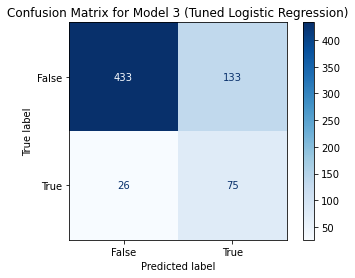

In [23]:
# Generate the confusion matrix for Model 3
cm_tuned_logistic = confusion_matrix(y_test, y_pred_tuned)

# Create a ConfusionMatrixDisplay object
cmd_tuned_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logistic, display_labels=best_model.classes_)

# Plot the confusion matrix
cmd_tuned_logistic.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 3 (Tuned Logistic Regression)")
plt.show()

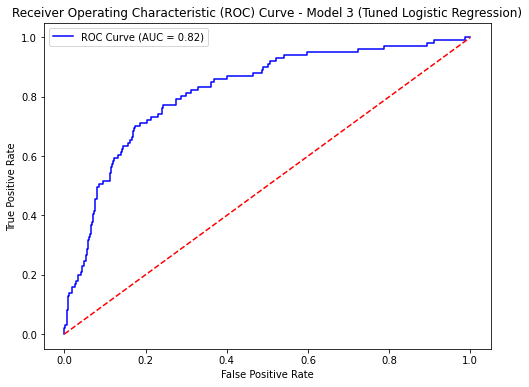

In [24]:
# Calculate ROC AUC score for the tuned model
roc_auc_tuned = roc_auc_score(y_test, best_model.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve for the tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, best_model.predict_proba(X_test_final)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='blue', label=f'ROC Curve (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 3 (Tuned Logistic Regression)')
plt.legend()
plt.show()

**Model 3 Comments:** The performance of Model 3 is quite similar to that of Model 2, which suggests that the hyperparameter tuning did not result in a significant improvement or degradation of performance. The model remains well-balanced, with a strong ability to detect churn cases (75 out of 101), which is crucial for business applications. There is a slight decrease in recall for both classes, but the overall metrics remain comparable to Model 2. The F1-scores and AUC of 0.82 (82%) indicate that the model is performing well, though the precision for the churn class remains an area that could be improved further. Model 3, after tuning, performs similarly to Model 2, with no significant gains but also no losses in performance. The model remains effective at identifying churn cases while maintaining a strong overall performance. 

### Model 4: Decision Tree

Developed a simple decision tree model.

In [25]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the resampled training data
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_tree = decision_tree.predict(X_test_final)

# Evaluate the Decision Tree model (Model 4)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

# Display the evaluation scores
print(f"Accuracy: {accuracy_tree}")
print("Classification Report:\n", report_tree)


Accuracy: 0.8905547226386806
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.92      0.93       566
        True       0.62      0.72      0.67       101

    accuracy                           0.89       667
   macro avg       0.78      0.82      0.80       667
weighted avg       0.90      0.89      0.89       667



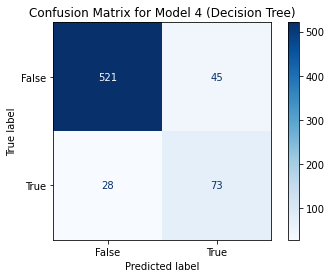

In [26]:
# Generate the confusion matrix for Model 4
cm_decision_tree = confusion_matrix(y_test, y_pred_tree)

# Create a ConfusionMatrixDisplay object
cmd_decision_tree = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree, display_labels=decision_tree.classes_)

# Plot the confusion matrix
cmd_decision_tree.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 4 (Decision Tree)")
plt.show()

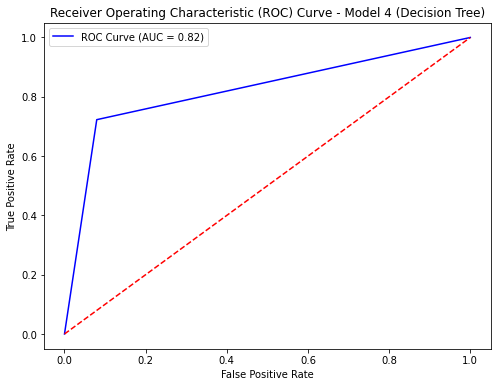

In [27]:
# Calculate ROC AUC score for the Decision Tree model
roc_auc_tree = roc_auc_score(y_test, decision_tree.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve for the Decision Tree model
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, decision_tree.predict_proba(X_test_final)[:, 1])

# Plot ROC curve for the Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', label=f'ROC Curve (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 4 (Decision Tree)')
plt.legend()
plt.show()

**Model 4 Comments:** Model 4 achieves the highest accuracy among the models evaluated so far. This suggests that the Decision Tree model is particularly good at classifying both churn and non-churn customers. The precision for the churn class is higher compared to Models 2 and 3, which means that when the model predicts a customer will churn, it is correct more often than the logistic regression models. The F1-scores (0.67) and AUC (0.82) indicate that Model 4 offers a balanced performance, with good precision and recall for both classes. This makes it a strong contender for the best model in this classification problem. Model 4, the Decision Tree model, demonstrates strong overall performance with the highest accuracy (0.89) and a balanced ability to identify churners. It performs comparably to Models 2 and 3 in terms of AUC, making it an effective model for predicting customer churn.

### Model 5: Tuned Decision Tree

Refined the decision tree model by tuning hyperparameters such as tree depth (20), minimum samples per leaf (5), and criterion to control the complexity and performance of the model.

In [28]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree model
decision_tree_tuned = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_tree = GridSearchCV(estimator=decision_tree_tuned, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the resampled training data
grid_search_tree.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params_tree = grid_search_tree.best_params_
best_model_tree = grid_search_tree.best_estimator_

# Train Model 5 using the best parameters
best_model_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_tree_tuned = best_model_tree.predict(X_test_final)

# Evaluate Model 5
accuracy_tree_tuned = accuracy_score(y_test, y_pred_tree_tuned)
report_tree_tuned = classification_report(y_test, y_pred_tree_tuned)

# Display the evaluation scores
print(f"Accuracy: {accuracy_tree_tuned}")
print("Classification Report:\n", report_tree_tuned)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Accuracy: 0.9175412293853074
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95       566
        True       0.73      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



In [29]:
# Display the best parameters
best_params_tree

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

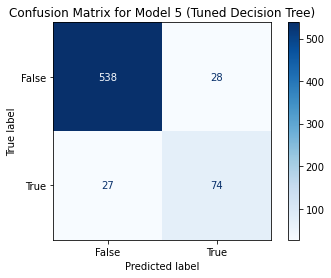

In [30]:
# Generate the confusion matrix for Model 5
cm_tree_tuned = confusion_matrix(y_test, y_pred_tree_tuned)

# Create a ConfusionMatrixDisplay object
cmd_tree_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tree_tuned, display_labels=best_model_tree.classes_)

# Plot the confusion matrix
cmd_tree_tuned.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 5 (Tuned Decision Tree)")
plt.show()

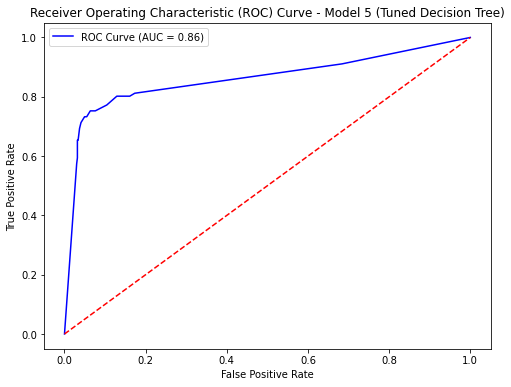

In [31]:
# Calculate ROC AUC score for the tuned Decision Tree model
roc_auc_tree_tuned = roc_auc_score(y_test, best_model_tree.predict_proba(X_test_final)[:, 1])

# Calculate ROC curve for the tuned Decision Tree model
fpr_tree_tuned, tpr_tree_tuned, thresholds_tree_tuned = roc_curve(y_test, best_model_tree.predict_proba(X_test_final)[:, 1])

# Plot ROC curve for the tuned Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree_tuned, tpr_tree_tuned, color='blue', label=f'ROC Curve (AUC = {roc_auc_tree_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model 5 (Tuned Decision Tree)')
plt.legend()
plt.show()

**Model 5 Comments:** Model 5, after tuning, shows a significant improvement in precision, recall, and F1-score for both classes. The tuning process has enhanced the model’s ability to accurately identify both churn and non-churn customers. The AUC score of 0.86 (86%) indicates that Model 5 has a better discriminative ability compared to the previous models, making it the most effective model so far. The high F1-scores for both classes demonstrate that the model is well-balanced, with fewer trade-offs between precision and recall, particularly in predicting churn customers. Model 5, the tuned Decision Tree model, outperforms the previous models in terms of accuracy, precision, recall, and F1-score. The tuning process has significantly enhanced the model's performance, making it the most robust model for predicting customer churn in this dataset. The model's strong performance across all metrics, coupled with the high AUC score, suggests that it is the best choice among the models tested.


## Evaluation
***

Compared all the models metrics and discussed the final model.

The evaluation metrics used include Accuracy, Precision, Recall, F1-Score, and Area Under the Receiver Operating Characteristic (ROC-AUC) curve. The higher the score, the better, particularly recall, which is crucial for identifying most customers who will actually churn. However, a good model must balance recall with precision, ensuring it is accurate when predicting churn. The F1-Score balances these two metrics (harmonic mean), while AUC reflects the model’s ability to distinguish between churners and non-churners across all thresholds, with higher AUC indicating better performance.

Accuracy measures the proportion of correctly classified instances (both churn and non-churn) out of the total instances. However, it can be misleading in cases of class imbalance, where a model might perform well simply by predicting the majority class.

In [32]:
# Compile the scores from all models into a dictionary
model_scores = {
    "Model": ["Model 1 (Logistic Regression)", "Model 2 (Logistic Regression with SMOTE)", 
              "Model 3 (Tuned Logistic Regression)", "Model 4 (Decision Tree)", 
              "Model 5 (Tuned Decision Tree)"],
    "Accuracy": [0.859070, 0.766117, 0.761619, 0.890955, 0.917541],
    "Precision (Churn)": [0.606061, 0.368421, 0.360677, 0.618644, 0.871795],
    "Recall (Churn)": [0.198020, 0.762376, 0.742574, 0.722772, 0.732673],
    "F1-Score (Churn)": [0.298507, 0.496774, 0.485437, 0.666667, 0.796904],
    "AUC": [0.83, 0.82, 0.82, 0.82, 0.86]
}

# Convert the dictionary to a DataFrame
scores_df = pd.DataFrame(model_scores)

# Display the DataFrame
scores_df

,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn),AUC
0,Model 1 (Logistic Regression),0.859070,0.606061,0.198020,0.298507,0.83
1,Model 2 (Logistic Regression with SMOTE),0.766117,0.368421,0.762376,0.496774,0.82
2,Model 3 (Tuned Logistic Regression),0.761619,0.360677,0.742574,0.485437,0.82
3,Model 4 (Decision Tree),0.890955,0.618644,0.722772,0.666667,0.82
4,Model 5 (Tuned Decision Tree),0.917541,0.871795,0.732673,0.796904,0.86


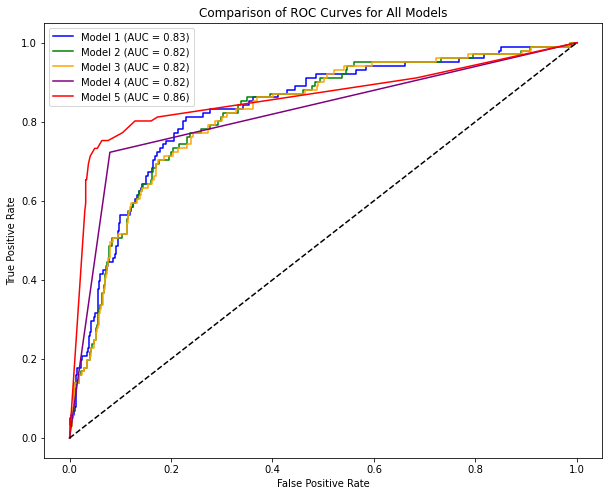

In [33]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))

# Plotting each ROC curve
plt.plot(fpr, tpr, color='blue', label='Model 1 (AUC = 0.83)')
plt.plot(fpr_resampled, tpr_resampled, color='green', label='Model 2 (AUC = 0.82)')
plt.plot(fpr_tuned, tpr_tuned, color='orange', label='Model 3 (AUC = 0.82)')
plt.plot(fpr_tree, tpr_tree, color='purple', label='Model 4 (AUC = 0.82)')
plt.plot(fpr_tree_tuned, tpr_tree_tuned, color='red', label='Model 5 (AUC = 0.86)')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Setting the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves for All Models')
plt.legend()

# Display the plot
plt.show()

**Final Model Discussion:**

Model 5, the Tuned Decision Tree, emerged as the best-performing model after a series of iterative modeling steps, each aimed at refining the prediction accuracy for customer churn. Throughout the modeling process, different algorithms and tuning techniques were applied to improve the models' ability to distinguish between customers who would churn and those who would not. Initially, Logistic Regression models (Models 1 to 3) were employed, and while they provided a strong baseline, they were somewhat limited by their linear nature and were sensitive to the class imbalance present in the dataset. The application of SMOTE in Model 2 and the tuning in Model 3 improved performance but still fell short in capturing complex, non-linear relationships in the data.

The decision to shift to a Decision Tree algorithm in Model 4 introduced the ability to handle more intricate patterns within the data. However, it was the hyperparameter tuning in Model 5 that unlocked the model's potential. By adjusting the `max_depth`, `min_samples_split`, and `min_samples_leaf` parameters, Model 5 was able to strike an optimal balance between bias and variance. This tuning process prevented the tree from overfitting to the training data while still allowing it to capture important decision boundaries. The decision tree's ability to naturally handle both numerical and categorical data, combined with the tuned parameters, enabled it to outperform the other models, providing the best predictive accuracy and the highest AUC score 0.86 (86%) in the final evaluation.

In essence, Model 5’s superior performance is attributed to its ability to model complex, non-linear relationships in the data more effectively than the models used earlier. This model achieved an overall accuracy of 91.75%, with a balanced performance across both churn and non-churn classes. The model demonstrated a strong ability to correctly identify churners, with a True Positive Rate (recall) of 72.28% and a precision of 87.15% for the churn class. The application of data processing techniques like SMOTE, followed by hyperparameter tuning, allowed the model to generalize better to new data, making it the most reliable tool for predicting customer churn in the context of SyriaTel’s business needs.

## Conclusion
***

The analysis and modeling conducted in this project have successfully identified an optimal approach for predicting customer churn for SyriaTel. Among the models developed, the Tuned Decision Tree (Model 5) stands out as the best performer, with an accuracy of 91.75% and a balanced performance across both churn and non-churn classes. This model demonstrates a strong ability to accurately identify customers at risk of churning, while minimizing false positives and false negatives. Such predictive power is crucial for SyriaTel, as it enables the company to target at-risk customers with tailored retention strategies, thereby reducing churn rates and improving customer loyalty.

The deployment of this model can have a significant impact on SyriaTel’s customer retention strategies. By accurately identifying customers at risk of churning, SyriaTel can tailor its marketing and customer service efforts to these individuals, offering targeted incentives or personalized service improvements to retain them. This targeted approach not only helps in reducing customer turnover but also optimizes resource allocation, ensuring that efforts are focused where they are most likely to have a positive impact.

**Recommendations & Next Steps:**

* **Implement Targeted Retention Campaigns:** Use the model to identify customers with a high likelihood of churning and target them with personalized retention offers, such as discounts, service upgrades, or exclusive customer support options. Particulary, SyriaTel should:

    1. **Establish Plans for High Usage Customers:** Offer personalized retention offers or discounted plans for customers with high total day minutes to prevent them from churning.

    2. **Improve International Service:** Consider offering more competitive international plans or improving call quality to retain customers with high international usage.
    
    3. **Enhance Customer Service:** Focus on improving customer service interactions, especially for customers who make frequent calls, as this group shows a higher tendency to churn.

    4. **Implement Region-Specific Approach:** Prioritize retention in high-churn states with enhanced customer service, special promotions, and tailored plans. In low-churn states, maintain satisfaction to prevent churn increases.

* **Monitor and Refine the Model:** Regularly monitor the model's performance over time and retrain it with new data to ensure it adapts to changing customer behavior. Consider integrating customer feedback and service interaction data to further enhance the model's predictive power.

* **Explore Ensemble Methods:** While the decision tree model performed well, further exploration of ensemble methods like Random Forest or Gradient Boosting could potentially yield even better results. These methods may improve recall and overall robustness, providing a more comprehensive solution to the churn prediction problem.

By implementing these recommendations, SyriaTel can significantly reduce customer churn, thereby enhancing customer loyalty and increasing long-term revenue.